In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.visualization.vis_data import *
from src.visualization.vis_model import *
from src.models.predict_model import * 
# set font size 
plt.rcParams.update({'font.size': 16})

output_notebook()

Loading BokehJS ...

# Load Model and Plot Model Performance PM2.5

In [3]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Bangkok', pollutant='PM2.5')

raw model performance {'test_r2_score': 0.2551, 'test_r2': 0.5655, 'test_mean_squared_error': 149.424, 'test_mean_absolute_error': 9.4248, 'test_mean_absolute_percentage_error': 56.732, 'test_median_absolute_error': 7.5643}
daily avg training error {'avg_trn_r2_score': 0.9233, 'avg_trn_r2': 0.9648, 'avg_trn_mean_squared_error': 13.6003, 'avg_trn_mean_absolute_error': 2.5735, 'avg_trn_mean_absolute_percentage_error': 13.1002, 'avg_trn_median_absolute_error': 1.6876}
daily avg test error {'avg_test_r2_score': 0.3336, 'avg_test_r2': 0.6329, 'avg_test_mean_squared_error': 108.4946, 'avg_test_mean_absolute_error': 8.0885, 'avg_test_mean_absolute_percentage_error': 43.8535, 'avg_test_median_absolute_error': 6.202}


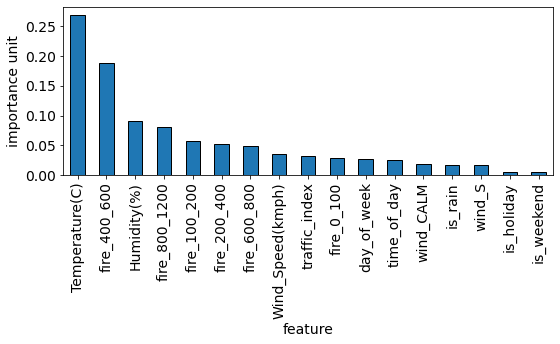

In [4]:
show_fea_imp(feat_imp,x_log=False, filename=None,title='')

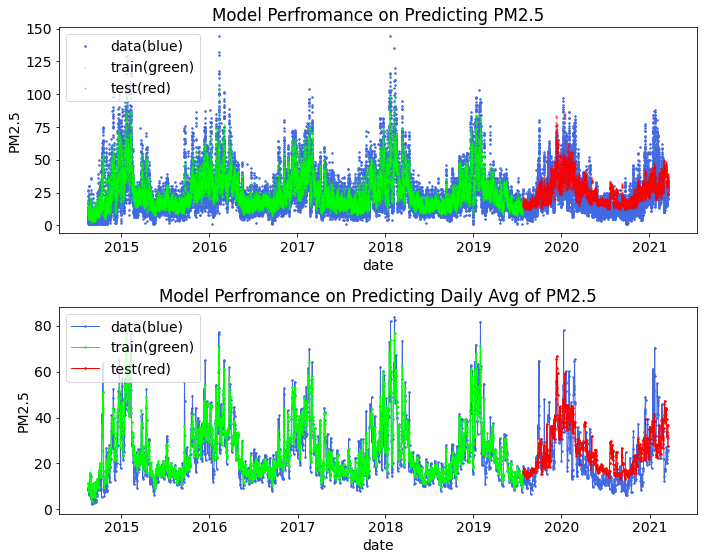

In [5]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.75, 0.25], xlim=[], to_save=True)

In [6]:
# calculate the average error for the training data
trn_error = cal_error(dataset, model, data_index=dataset.split_list[0])

# resample
ytrn_pred_df_avg = trn_error.resample('d').mean().dropna()
cal_scores(ytrn_pred_df_avg['actual'].values, ytrn_pred_df_avg['pred'].values, header_str='avg_trn_')

{'avg_trn_r2_score': 0.9233,
 'avg_trn_r2': 0.9648,
 'avg_trn_mean_squared_error': 13.6003,
 'avg_trn_mean_absolute_error': 2.5735,
 'avg_trn_mean_absolute_percentage_error': 13.1002,
 'avg_trn_median_absolute_error': 1.6876}

In [7]:
# calculate the average error for the test data
ytest_pred_df = cal_error(dataset, model, data_index=dataset.split_list[1])
# resample
ytest_pred_df_avg = ytest_pred_df.resample('d').mean().dropna()
cal_scores(ytest_pred_df_avg['actual'].values, ytest_pred_df_avg['pred'].values, header_str='avg_test_')

{'avg_test_r2_score': 0.3336,
 'avg_test_r2': 0.6329,
 'avg_test_mean_squared_error': 108.4946,
 'avg_test_mean_absolute_error': 8.0885,
 'avg_test_mean_absolute_percentage_error': 43.8535,
 'avg_test_median_absolute_error': 6.202}

# Inference Object

In [2]:
# init Inferer
inferer = Inferer(city_name='Bangkok', pollutant='PM2.5')
# a dataset object if one of Inferer's attributes
dataset = inferer.dataset

raw model performance {'test_r2_score': 0.2111, 'test_r2': 0.5464, 'test_mean_squared_error': 158.2774, 'test_mean_absolute_error': 9.8669, 'test_mean_absolute_percentage_error': 62.9437, 'test_median_absolute_error': 8.383}
daily avg training error {'avg_trn_r2_score': 0.9788, 'avg_trn_r2': 0.9909, 'avg_trn_mean_squared_error': 3.7717, 'avg_trn_mean_absolute_error': 1.3568, 'avg_trn_mean_absolute_percentage_error': 6.1781, 'avg_trn_median_absolute_error': 0.917}
daily avg test error {'avg_test_r2_score': 0.265, 'avg_test_r2': 0.6076, 'avg_test_mean_squared_error': 119.8108, 'avg_test_mean_absolute_error': 8.6641, 'avg_test_mean_absolute_percentage_error': 49.5583, 'avg_test_median_absolute_error': 7.4212}
max error 5.715281293997874


In [3]:
inferer.get_data_sample_(n_samples=20, step=1, day_err=10, hour_err=2)

obtaining inference samples. This will take about 15 mins


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14424/14424 [08:33<00:00, 28.07it/s]


datasample columns Index(['Wind_Speed(kmph)', 'Wind_Speed(kmph)_lag_1', 'Wind_Speed(kmph)_lag_10',
       'Wind_Speed(kmph)_lag_11', 'Wind_Speed(kmph)_lag_12',
       'Wind_Speed(kmph)_lag_13', 'Wind_Speed(kmph)_lag_14',
       'Wind_Speed(kmph)_lag_15', 'Wind_Speed(kmph)_lag_16',
       'Wind_Speed(kmph)_lag_17',
       ...
       'fire_200_400_lag_96', 'fire_400_600_lag_96', 'fire_600_800_lag_96',
       'fire_800_1000_lag_96', 'fire_0_100_lag_97', 'fire_100_200_lag_97',
       'fire_200_400_lag_97', 'fire_400_600_lag_97', 'fire_600_800_lag_97',
       'fire_800_1000_lag_97'],
      dtype='object', length=1079)
adding lag
adding calendar information
datasample has shape (211350, 1270)


(0.0, 85.0)

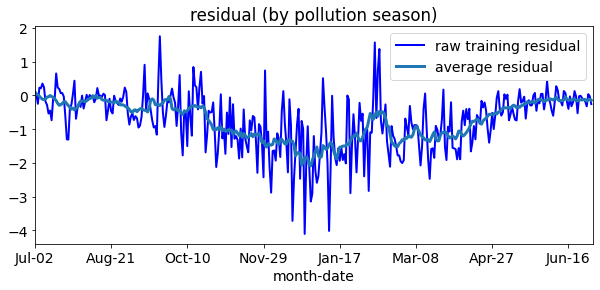

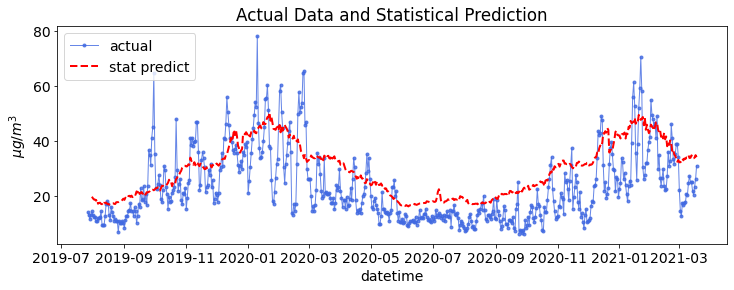

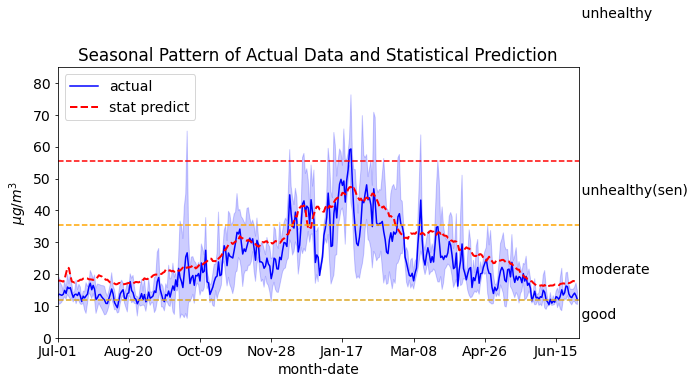

In [32]:
ax, sea_pred = inferer.compare_inf_act(q_list=[ 0.70])
ax.set_ylim([0, 85])

In [5]:
winter_days = np.arange(124, 276)

In [33]:
# yearly average
sea_pred.mean(axis=0)

q0.7    27.372177
dtype: float64

In [34]:
# winter average
sea_pred.loc[winter_days].mean()

q0.7    36.367741
dtype: float64

In [7]:
df, winter_day_dict = season_avg(inferer.dataset.poll_df, cols=['PM2.5'], roll=True, agg='max', offset=182)
mean_day = df.groupby('winter_day').mean()['PM2.5']
mean_day.mean()

26.560412871888282

In [8]:
mean_day.loc[winter_days].mean()

36.57069105054303

# Effect of Reduce Fire

In [9]:
features = inferer.feat_imp['index'][inferer.feat_imp['index'].str.contains('fire')][:5]
zone_list = inferer.zone_list
feature_list = []
columns_list = []
for i in range(1,7):
    fea = features[:i]
    feature_list.append(fea)
    columns_list.append(f'fire {zone_list[0]}-{zone_list[i]}km')
    
rawplot_folder = dataset.model_folder
fea_effect_3m = inferer.features_effect_sum(feature_list, q=0.70, red_list=[0,  0.9999 ], time_range=[124, 276],agg='mean', raw_filename= rawplot_folder +'effect_of_fire_reduction_3m' )
fea_effect_3m.columns = columns_list
# change from percent to whole number
fea_effect_3m.index *= 100
fea_effect_3m.index = fea_effect_3m.index.astype(int)
# save the raw plot for animation 
fea_effect_3m.to_csv(dataset.model_folder +'effect_of_fire_reduction_3m.csv', index=True)

In [10]:
fea_effect_3m

,fire 0-100km,fire 0-200km,fire 0-400km,fire 0-600km,fire 0-800km,fire 0-1000km
100,36.329833,36.329833,36.329833,36.329833,36.329833,36.329833
0,31.225378,34.094936,31.744678,29.080086,29.671195,29.671195


In [11]:
fire_season = pd.read_csv(rawplot_folder +'effect_of_fire_reduction_3m_5.csv').set_index('winter_day')

In [12]:
# calculate the mean of BKK 
winter_days = np.arange(124, 276)
df, winter_day_dict = season_avg(inferer.dataset.poll_df, cols=['PM2.5'], roll=True, agg='max', offset=182)
mean_day = df.groupby('winter_day').mean()['PM2.5']
yl_mean = mean_day.mean()
win_mean = mean_day.loc[winter_days].mean()

print(yl_mean, win_mean)

26.560412871888282 36.57069105054303


In [13]:
yl_mean = fire_season.mean(axis=0).iloc[0]
win_mean = fire_season.loc[winter_days].mean(axis=0).iloc[0]

print(yl_mean, win_mean)

27.372176599589483 36.36774117542186


In [14]:
# yearly differences 
agri_yl = yl_mean - fire_season.mean(axis=0).iloc[1]

In [15]:
# winter differences 

agri_win = win_mean - fire_season.loc[winter_days].mean(axis=0).iloc[1]

Effect of traffic

In [16]:
all_cols = inferer.data_samples.columns.to_list()
data_senario = inferer.data_samples.copy()

cols_to_cut = []
features = ['is_holiday', 'is_weekend' ]
for feature in features:
    cols_to_cut  = cols_to_cut + [s for s in all_cols if feature in s ]
data_senario[cols_to_cut]  = 1

#cols_to_cut = []
#features = ['time_of_day' ]
#for feature in features:
#    cols_to_cut  = cols_to_cut + [s for s in all_cols if feature in s ]
#data_senario[cols_to_cut]  = 16.0

cols_to_cut = []
features = ['traffic_index' ]
for feature in features:
    cols_to_cut  = cols_to_cut + [s for s in all_cols if feature in s ]
data_senario[cols_to_cut]  = 0

In [17]:
x = data_senario.values
y = inferer.model.predict(x)

ypred_df = pd.Series(y, index=inferer.data_samples.index)

In [18]:
band_df = make_band(ypred_df, q_list=[0.70])

sea_pred = cal_season_band(band_df, inferer.sea_error)

In [19]:
print(sea_pred.mean())

print(yl_mean - sea_pred.mean()   )
traffic_yl = yl_mean - sea_pred.mean().values[0] 

q0.7    28.623593
dtype: float64
q0.7   -1.251416
dtype: float64


In [20]:
print(sea_pred.loc[winter_days].mean())

print(win_mean - sea_pred.loc[winter_days].mean())

traffic_win  = win_mean - sea_pred.loc[winter_days].mean().values[0]

q0.7    35.52176
dtype: float64
q0.7    0.845982
dtype: float64


Other Factor

In [21]:
all_cols = inferer.data_samples.columns.to_list()
data_senario = inferer.data_samples.copy()

features = ['Wind_W', 'Wind_CLAM' , 'Wind_E', 'Wind_N']

cols_to_cut = []

for feature in features:

    cols_to_cut  = cols_to_cut + [s for s in all_cols if feature in s ]
    
data_senario[cols_to_cut]  = 0

features = ['Wind_S' ]
cols_to_cut = []
for feature in features:

    cols_to_cut  = cols_to_cut + [s for s in all_cols if feature in s ]
    
data_senario[cols_to_cut]  = 1

In [22]:
x = data_senario.values
y = inferer.model.predict(x)

ypred_df = pd.Series(y, index=inferer.data_samples.index)
band_df = make_band(ypred_df, q_list=[0.70])

sea_pred = cal_season_band(band_df, inferer.sea_error)

In [23]:
print(sea_pred.mean())

print(yl_mean - sea_pred.mean()   )
oth_yl = yl_mean - sea_pred.mean().values[0]

q0.7    37.771474
dtype: float64
q0.7   -10.399297
dtype: float64


In [24]:
print(sea_pred.loc[winter_days].mean())

print(win_mean - sea_pred.loc[winter_days].mean())

oth_win = win_mean - sea_pred.loc[winter_days].mean().values[0]

q0.7    40.30594
dtype: float64
q0.7   -3.938199
dtype: float64


In [25]:
source_contri = pd.DataFrame({'source': ['agricultural\nburning', 'other factors', 'traffic'],
                             'importance_win': [agri_win, oth_win, traffic_win],
                             'importance_yl':[agri_yl , oth_yl  , traffic_yl]})

source_contri['importance_win'] += np.abs(source_contri['importance_win'].min())*2
source_contri['importance_yl'] += np.abs(source_contri['importance_yl'].min())*2

source_contri['importance_win'] /= source_contri['importance_win'].sum() 
source_contri['importance_win'] = source_contri['importance_win'].round(2)
source_contri['degree_win'] = source_contri['importance_win']*360 
source_contri['degree_win'] = source_contri['degree_win'].astype(int)
source_contri['importance_win'] *= 100

source_contri['importance_yl'] /= source_contri['importance_yl'].sum() 
source_contri['importance_yl'] = source_contri['importance_yl'].round(2)
source_contri['importance_yl'] *= 100

source_contri['degree_yl'] = source_contri['importance_yl']*360 
source_contri['degree_yl'] = source_contri['degree_yl'].astype(int)

In [26]:
source_contri

,source,importance_win,importance_yl,degree_win,degree_yl
0,agricultural\nburning,53.0,44.0,190,15840
1,other factors,14.0,19.0,50,6840
2,traffic,32.0,36.0,115,12960


In [27]:
color_list = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

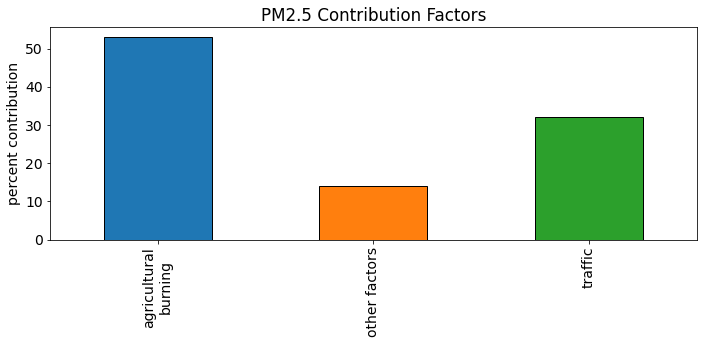

In [28]:
source_contri.plot('source',
            'importance_win',
            kind='bar', color=[ u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728' ],
            figsize=(
                10,
                5),
            linewidth=1,
            edgecolor='black',
            legend=False, error_kw=dict(ecolor='black', lw=1, capsize=4, capthick=1))

plt.ylabel('percent contribution')
plt.xlabel(None)
plt.title('PM2.5 Contribution Factors')
plt.tight_layout()
plt.savefig('E:/Documents/Downloads/' + 'bar_win.png')

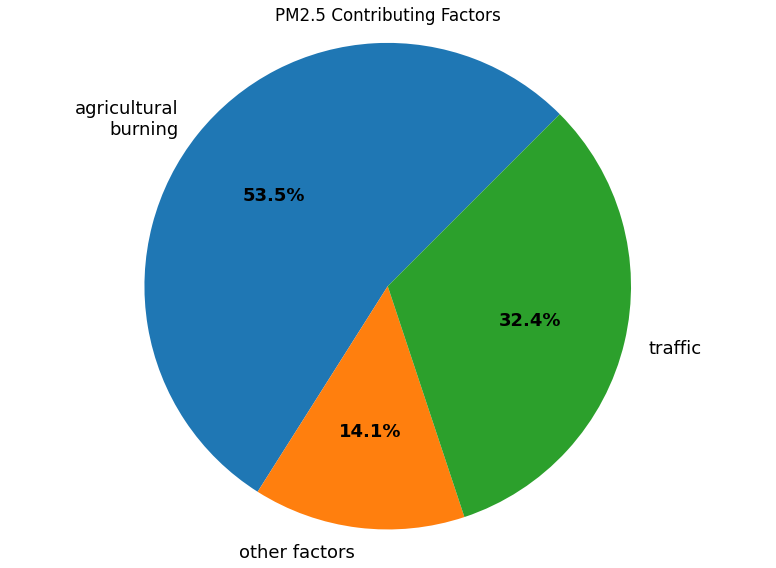

In [29]:
fig, ax = plt.subplots(1,1, figsize=(11,8))

explode = (0, 0, 0.0 )
wedges, texts, autotexts = ax.pie(source_contri['degree_win'], autopct='%1.1f%%', labels = source_contri['source'].tolist(),explode= explode, shadow=False, startangle=45)
ax.axis('equal')
for text in texts:
    text.set_fontsize(18)   

# = ax.pie(data, autopct=lambda pct: func(pct, data),
#                                  textprops=dict(color="w"))

labels = [ str(round(p*100/360, 1)) +'%' + ' '+s   for s, p in zip(source_contri['source'], source_contri['degree_win'])]

#ax.legend(wedges, labels,
#          title="factors",
#          loc="upper right", bbox_to_anchor=(1.3, 0.9))
plt.title('PM2.5 Contributing Factors')
plt.setp(autotexts, size=18, weight="bold")
plt.tight_layout()
plt.savefig('E:/Documents/Downloads/' + 'pie_win.png')

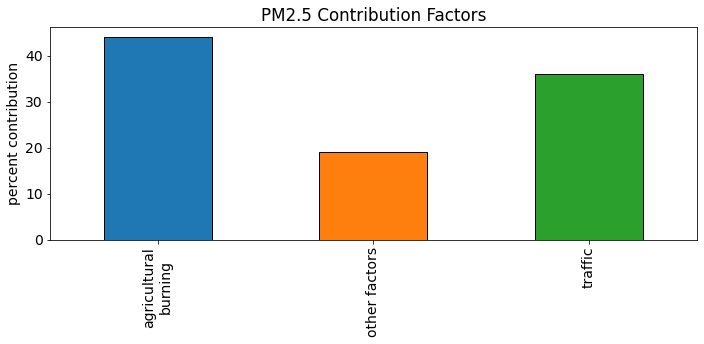

In [30]:
source_contri.plot('source',
            'importance_yl',
            kind='bar', color=[ u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728' ],
            figsize=(
                10,
                5),
            linewidth=1,
            edgecolor='black',
            legend=False, error_kw=dict(ecolor='black', lw=1, capsize=4, capthick=1))

plt.ylabel('percent contribution')
plt.xlabel(None)
plt.title('PM2.5 Contribution Factors')
plt.tight_layout()

plt.savefig('E:/Documents/Downloads/' + 'bar_yl.png')

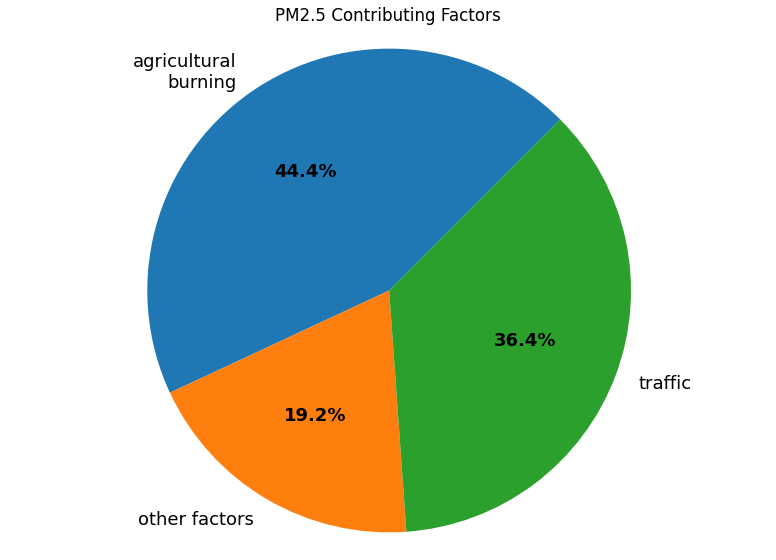

In [31]:
fig, ax = plt.subplots(1,1, figsize=(11,8))

explode = (0, 0, 0.0 )
wedges, texts, autotexts = ax.pie(source_contri['degree_yl'], autopct='%1.1f%%', labels = source_contri['source'].tolist(),explode= explode, shadow=False, startangle=45)
ax.axis('equal')
for text in texts:
    text.set_fontsize(18)   

# = ax.pie(data, autopct=lambda pct: func(pct, data),
#                                  textprops=dict(color="w"))

labels = [ str(round(p*100/360, 1)) +'%' + ' '+s   for s, p in zip(source_contri['source'], source_contri['degree_yl'])]

#ax.legend(wedges, labels,
#          title="factors",
#          loc="upper right", bbox_to_anchor=(1.3, 0.9))
plt.title('PM2.5 Contributing Factors')
plt.setp(autotexts, size=18, weight="bold")
plt.tight_layout()

plt.savefig('E:/Documents/Downloads/' + 'pi_yl.png')